___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** or other clustering methods, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns= {"Annual Income (k$)" : "Annual_Income", "Spending Score (1-100)" : "Spending_Score"}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [8]:
df.drop(columns= "CustomerID", inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
# Number of unique values in object features
print("Number of Unique Values in object features")
print("-----------------------------------------")
for col in df:
    print(f"{col} : {df[col].nunique()}")

Number of Unique Values in object features
-----------------------------------------
Gender : 2
Age : 51
Annual_Income : 64
Spending_Score : 84


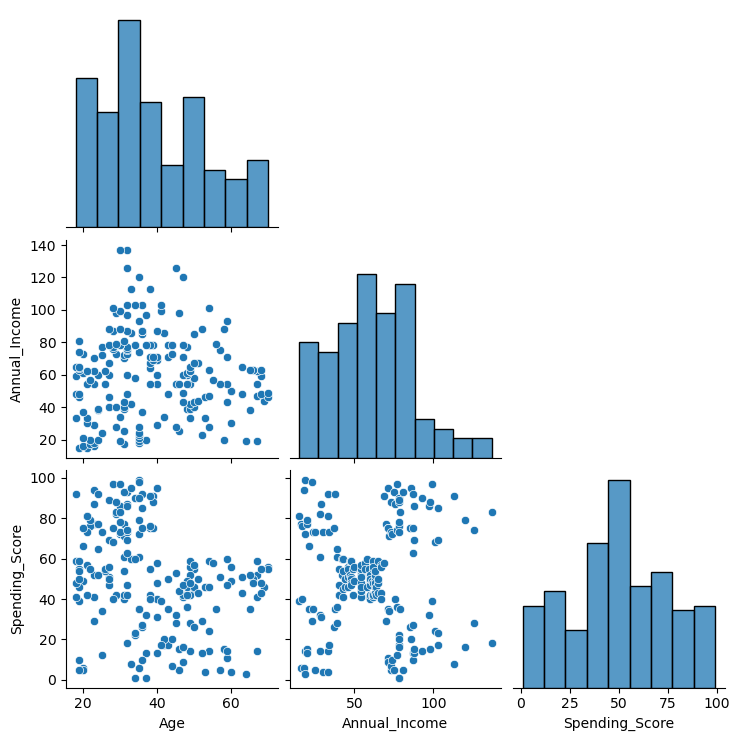

In [11]:
sns.pairplot(df, corner=True)
plt.show()

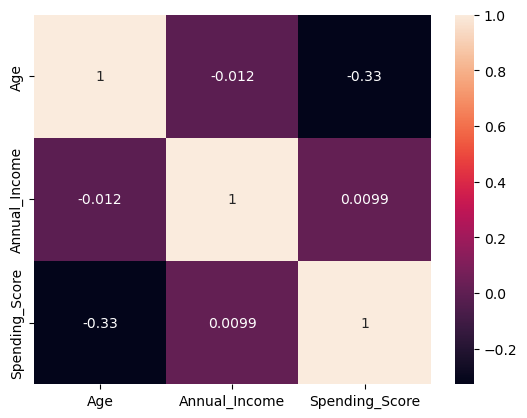

In [12]:
sns.heatmap(df.corr(), annot=True);

plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "Spending_Score", data = df)
sns.stripplot(y = "Age", x = "Spending_Score", data = df, palette="dark")

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "Annual_Income", data = df)
sns.stripplot(y = "Spending_Score", x = "Annual_Income", data = df, palette="dark")

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [13]:
X = df[["Annual_Income", "Spending_Score"]]

In [14]:
X.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X = scaler.fit_transform(X)

## Hopkins Test

In [18]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [19]:
hopkins(X, X.shape[0])

0.2875834271781917

#### *ii. Determine optimal number of clusters*

#### Elbow method

In [20]:
from sklearn.cluster import KMeans

In [21]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters = k, 
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [22]:
ssd

[270.70426664306717,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.91118554999014,
 37.7364034625416,
 32.37525368158286]

Text(0.5, 1.0, 'elbow method')

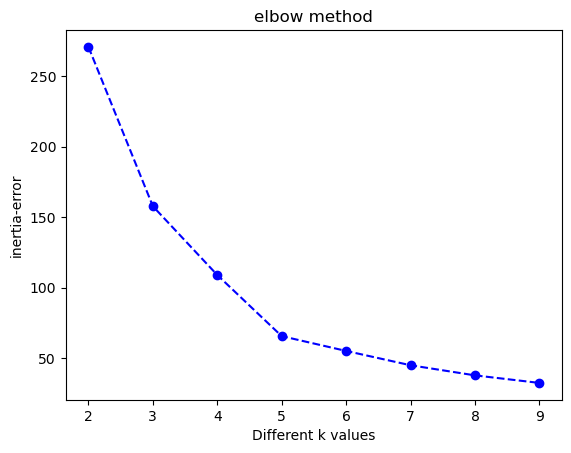

In [23]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

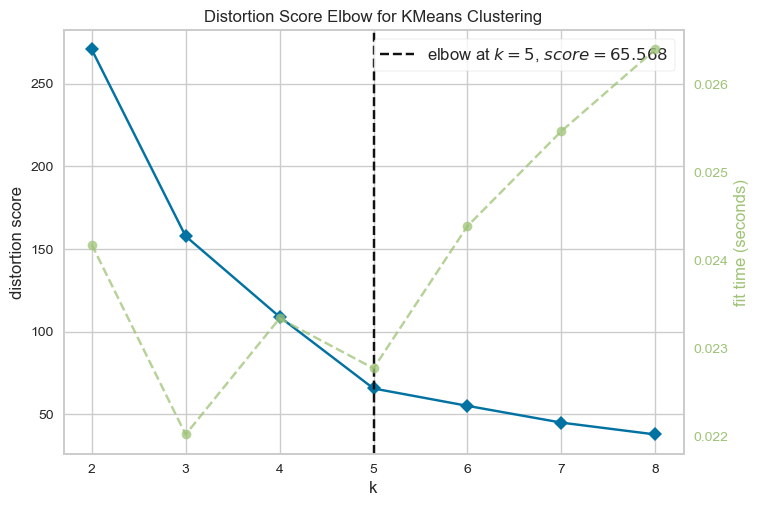

In [24]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

In [25]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score = (b-a)/max(a,b)

# b : the mean nearest-cluster distance 
# a : the mean intra-cluster distance 

for red point, 

b = 1 
a = ((1+1)**0.5 + (1+1)**0.5)/2  ==> 1.41

silhouette_score = (1-1.41)/1.41 ==> -0.29

In [26]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45584381231187066


In [27]:
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [28]:
X_scaled_df = pd.DataFrame(data=X, columns=["Annual_Income", "Spending_Score"])

In [29]:
np.__version__

'1.20.3'

In [29]:
X_scaled_df

,Annual_Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [30]:
x_scaled_df1 = X_scaled_df.copy()

In [31]:
model = KMeans(n_clusters=6, random_state=42)

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer

In [33]:
# pip install -U threadpoolctl

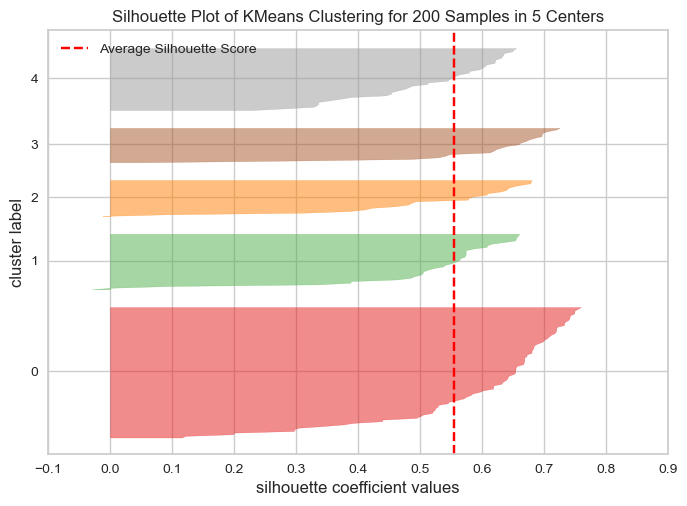

In [34]:
model5 = KMeans(n_clusters=5, 
                random_state=42)          
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X_scaled_df)    # Fit the data to the visualizer
visualizer.poof();

In [35]:
model5.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [36]:
visualizer.silhouette_samples_

array([ 0.41124046,  0.69620683,  0.63934069,  0.69604195,  0.38563359,
        0.69748215,  0.64833998,  0.65893138,  0.62927054,  0.66184814,
        0.67709497,  0.62250892,  0.67914947,  0.7183836 ,  0.67989007,
        0.72517377,  0.480728  ,  0.54086604,  0.57771355,  0.63069704,
        0.46089203,  0.67601561,  0.64089467,  0.67033897,  0.66074953,
        0.70471845,  0.48567333,  0.29331369,  0.4925691 ,  0.6846275 ,
        0.60601978,  0.61174317,  0.57727428,  0.61836077,  0.6096252 ,
        0.64028425,  0.58637068,  0.52937454,  0.42191998,  0.48596674,
        0.09076309,  0.54813337, -0.01212476,  0.12114123,  0.3126116 ,
        0.04964594,  0.39355123,  0.43860327,  0.29680812,  0.29680812,
        0.52456542,  0.3036705 ,  0.51899981,  0.34289529,  0.49331338,
        0.37566018,  0.60191899,  0.54434561,  0.64121219,  0.59585853,
        0.55956233,  0.58127935,  0.65113096,  0.50415135,  0.6798204 ,
        0.52847598,  0.6854379 ,  0.66721797,  0.52847598,  0.65

In [37]:
for i in range(5):
    label = (model5.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5978670176450109
mean silhouette score for label 1    : 0.505215392212549
mean silhouette score for label 2    : 0.5105060797073506
mean silhouette score for label 3    : 0.5982119461245773
mean silhouette score for label 4    : 0.5107528927571013
mean silhouette score for all labels : 0.5546571631111091


#### *iii. Apply K Means*

In [38]:
model = KMeans(n_clusters = 5, random_state=42)
model.fit_predict(X)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [39]:
clusters = model.labels_

In [40]:
X_scaled_df["Predicted_Clusters"] = clusters

In [41]:
X_scaled_df.head()

,Annual_Income,Spending_Score,Predicted_Clusters
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,2


In [42]:
X_scaled_df["Predicted_Clusters"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Predicted_Clusters, dtype: int64

In [43]:
mp.__version__

'3.7.0'

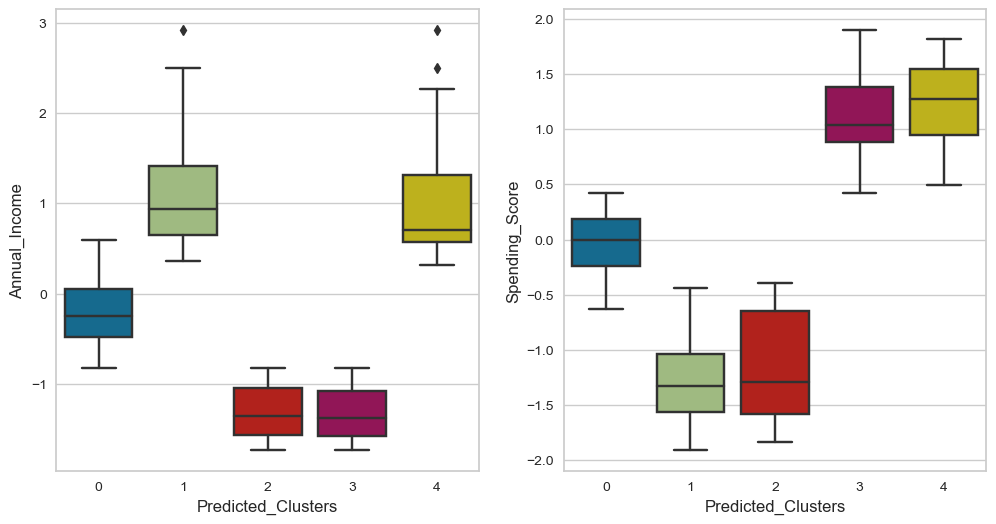

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_scaled_df, x= "Predicted_Clusters", y= "Annual_Income")

plt.subplot(1,2,2)
sns.boxplot(data=X_scaled_df, x= "Predicted_Clusters", y= "Spending_Score");

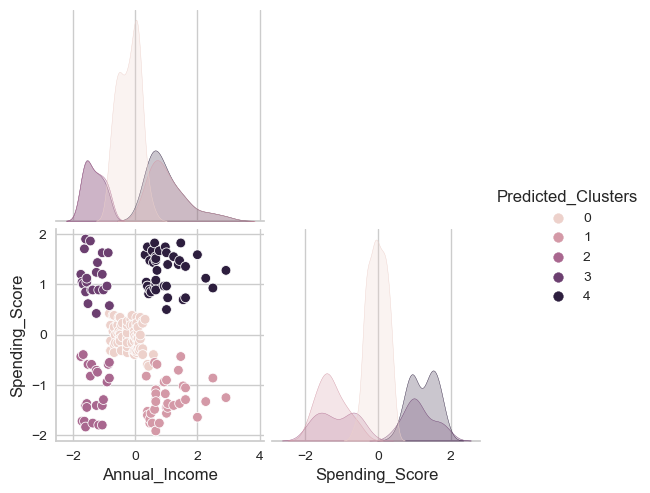

In [45]:
sns.pairplot(data = X_scaled_df, hue = "Predicted_Clusters", corner = True);

In [46]:
centers = model5.cluster_centers_
centers

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [47]:
centers[:,0]

array([-0.20091257,  1.05500302, -1.30751869, -1.32954532,  0.99158305])

In [48]:
centers[:,1]

array([-0.02645617, -1.28443907, -1.13696536,  1.13217788,  1.23950275])

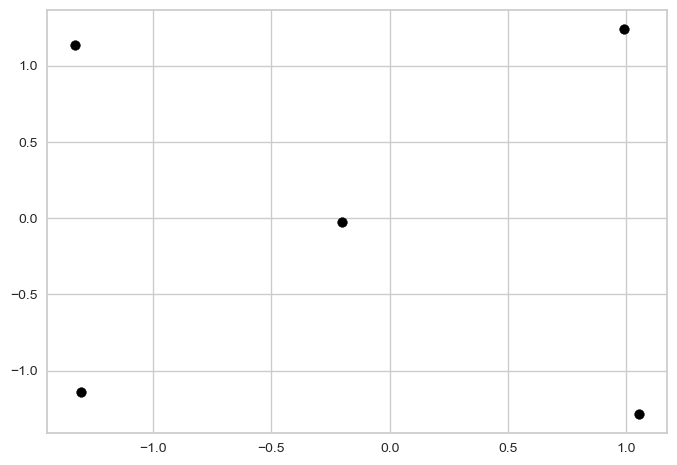

In [49]:
plt.scatter(centers[:,0], centers[:,1], c="black")

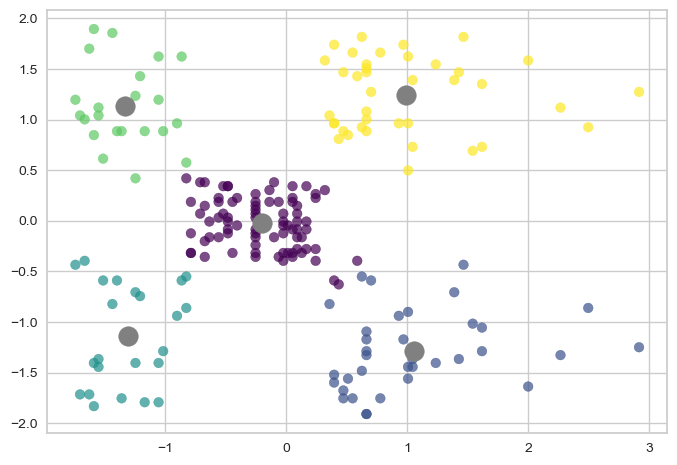

In [50]:
plt.scatter(X_scaled_df["Annual_Income"],
            X_scaled_df["Spending_Score"],
            c=X_scaled_df.Predicted_Clusters,
            cmap="viridis",
            alpha=0.7)  # X.predicted_clusters
plt.scatter(centers[:, 0],
            centers[:, 1], 
            c='grey', 
            s=200, 
            alpha=1)

In [51]:
X_scaled_df["labels"] = X_scaled_df.Predicted_Clusters.map({ 0 : "orta", 1: "tutumlu", 2: "fakir", 3: "parasız_harcayan", 4: "müsrif"})
X_scaled_df

,Annual_Income,Spending_Score,Predicted_Clusters,labels
0,-1.738999,-0.434801,2,fakir
1,-1.738999,1.195704,3,parasız_harcayan
2,-1.700830,-1.715913,2,fakir
3,-1.700830,1.040418,3,parasız_harcayan
4,-1.662660,-0.395980,2,fakir
...,...,...,...,...
195,2.268791,1.118061,4,müsrif
196,2.497807,-0.861839,1,tutumlu
197,2.497807,0.923953,4,müsrif
198,2.917671,-1.250054,1,tutumlu


In [52]:
X_scaled_df

,Annual_Income,Spending_Score,Predicted_Clusters,labels
0,-1.738999,-0.434801,2,fakir
1,-1.738999,1.195704,3,parasız_harcayan
2,-1.700830,-1.715913,2,fakir
3,-1.700830,1.040418,3,parasız_harcayan
4,-1.662660,-0.395980,2,fakir
...,...,...,...,...
195,2.268791,1.118061,4,müsrif
196,2.497807,-0.861839,1,tutumlu
197,2.497807,0.923953,4,müsrif
198,2.917671,-1.250054,1,tutumlu


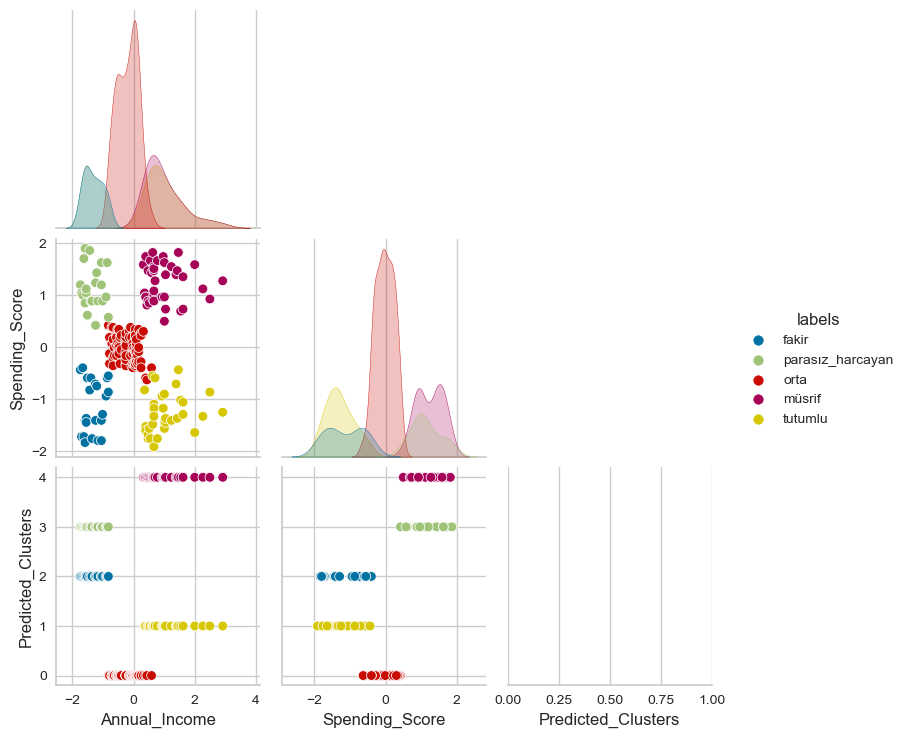

In [53]:
sns.pairplot(data = X_scaled_df, hue = "labels", corner = True);

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [115]:
X = df[["Age", "Spending_Score"]]

In [116]:
X

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [117]:
X_scaled = scaler.fit_transform(X)

# hopkins

In [118]:
hopkins(X, X.shape[0])

0.2989904062609063

#### *ii. Determine optimal number of clusters*

# Elbow method

In [119]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters = k, 
                   random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

In [120]:
ssd

[189.38749033992428,
 124.32628617921526,
 89.76521676586151,
 71.2955659221944,
 53.17373745380917,
 46.44628500949162,
 39.305873251926876,
 33.83644725407147]

Text(0.5, 1.0, 'elbow method')

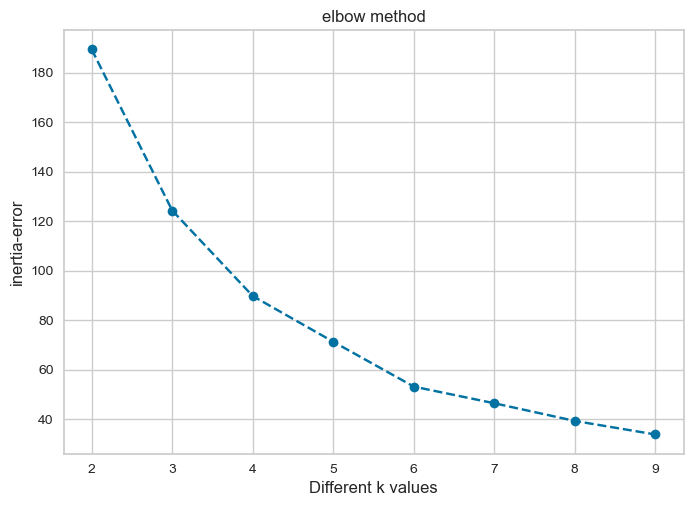

In [121]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

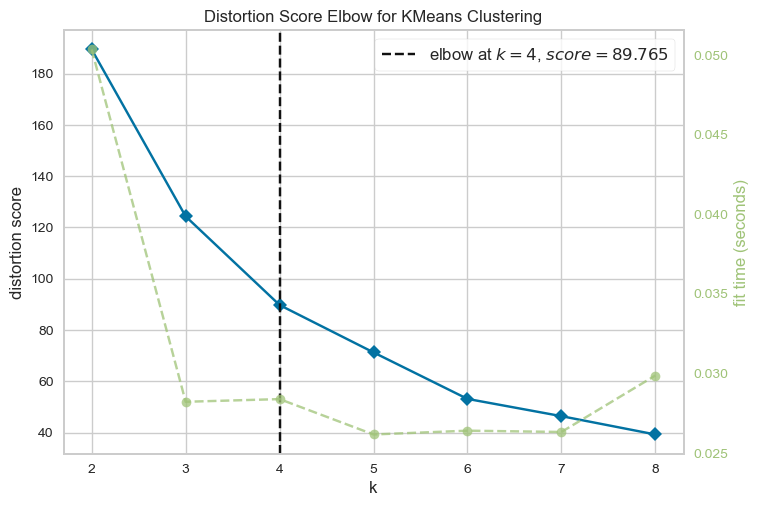

In [122]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.poof();

In [123]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47212716430695223
For n_clusters=3, the silhouette score is 0.4395299000230284
For n_clusters=4, the silhouette score is 0.4383860846564479
For n_clusters=5, the silhouette score is 0.4475485887887892
For n_clusters=6, the silhouette score is 0.4531637132878646
For n_clusters=7, the silhouette score is 0.4005396447043195
For n_clusters=8, the silhouette score is 0.4138741299279621


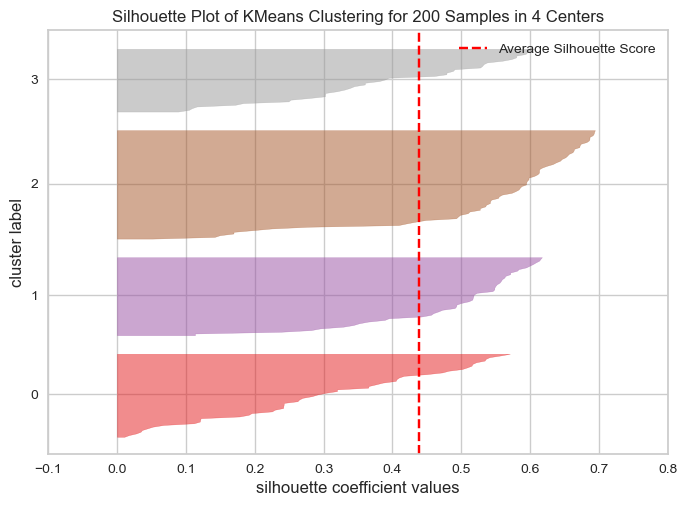

In [124]:
model = KMeans(n_clusters=4, 
                random_state=42)          
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [125]:
model.labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

#### *iii. Apply K Means*

In [126]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=4, 
                       random_state=42)

In [127]:
K_means_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [128]:
models = K_means_model.predict(X_scaled)

In [129]:
K_means_model.fit_predict(X_scaled)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

In [130]:
K_means_model.labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

In [131]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit_predict(X_scaled)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

In [132]:
silhouette_score(X_scaled, K_means_model.labels_)
# silhouette_score 1'e ne kadar yakınsa kümelemem o kadar kalitelidir.

0.4383860846564479

In [133]:
visualizer.silhouette_samples_

array([0.50844679, 0.52676091, 0.24208287, 0.53580882, 0.53527818,
       0.49495581, 0.30197983, 0.58714298, 0.30189232, 0.57274153,
       0.10872012, 0.61729918, 0.35985368, 0.55910745, 0.33842387,
       0.53451211, 0.3194381 , 0.16903248, 0.1043463 , 0.62409449,
       0.3194381 , 0.51181434, 0.59971423, 0.59736572, 0.47801684,
       0.68160775, 0.17173763, 0.19770124, 0.11594401, 0.5975746 ,
       0.39468422, 0.40876393, 0.5322204 , 0.49227514, 0.57270522,
       0.52676091, 0.52716702, 0.59396305, 0.01065889, 0.42059604,
       0.35131848, 0.61045793, 0.11328764, 0.16936751, 0.24905105,
       0.22484339, 0.57079771, 0.47215211, 0.53370821, 0.51478535,
       0.54513375, 0.1417157 , 0.19116525, 0.60811708, 0.49276696,
       0.29514186, 0.57103209, 0.4902316 , 0.37610563, 0.55125025,
       0.51804138, 0.2620476 , 0.55730268, 0.60396265, 0.59384969,
       0.12162515, 0.23771338, 0.52241854, 0.12072956, 0.40922323,
       0.51734998, 0.328427  , 0.59900235, 0.61686629, 0.58329

In [134]:
labels_1 = (model.labels_ == 1)

In [135]:
mean_silhoutte_score_1 = visualizer.silhouette_samples_[labels_1].mean()
mean_silhoutte_score_1

0.4824860720402543

In [136]:
for i in range(5):
    label = (model.labels_== i)
    print(f"mean silhouette score for label {i:<5} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0     : 0.29781268076224776
mean silhouette score for label 1     : 0.4824860720402543
mean silhouette score for label 2     : 0.5419338883152877
mean silhouette score for label 3     : 0.39168512544188266
mean silhouette score for label 4     : nan
mean silhouette score for all labels : 0.4383860846564479


#### *iv. Visualizing and Labeling All the Clusters*

In [137]:
X_scaled = pd.DataFrame(data=X, columns=["Age", "Spending_Score"])

In [138]:
clusters = model.labels_

In [139]:
X_scaled["Predicted_Clusters"] = clusters

In [140]:
X_scaled.head()

,Age,Spending_Score,Predicted_Clusters
0,19,39,0
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,0


In [142]:
X_scaled["Predicted_Clusters"].value_counts()

2    65
0    50
1    47
3    38
Name: Predicted_Clusters, dtype: int64

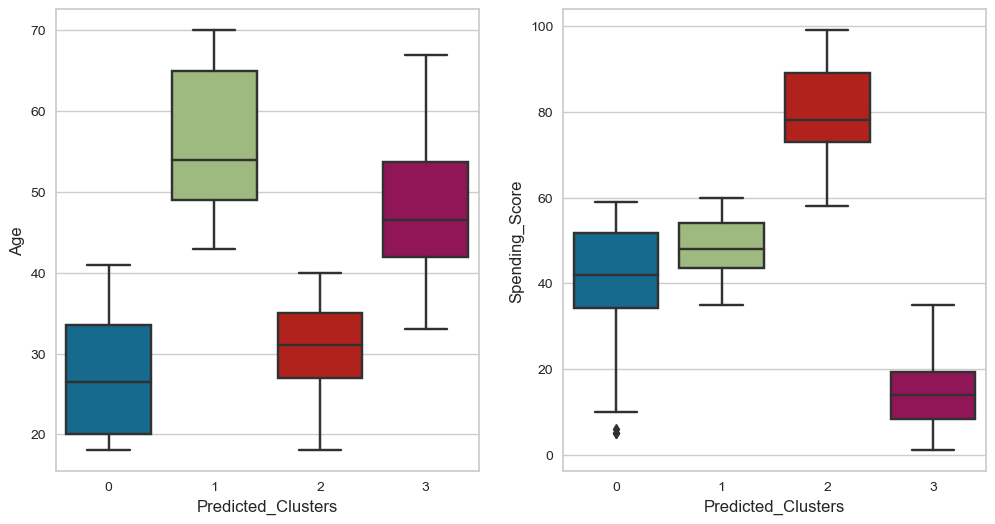

In [143]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_scaled, x= "Predicted_Clusters", y= "Age")

plt.subplot(1,2,2)
sns.boxplot(data=X_scaled, x= "Predicted_Clusters", y= "Spending_Score");

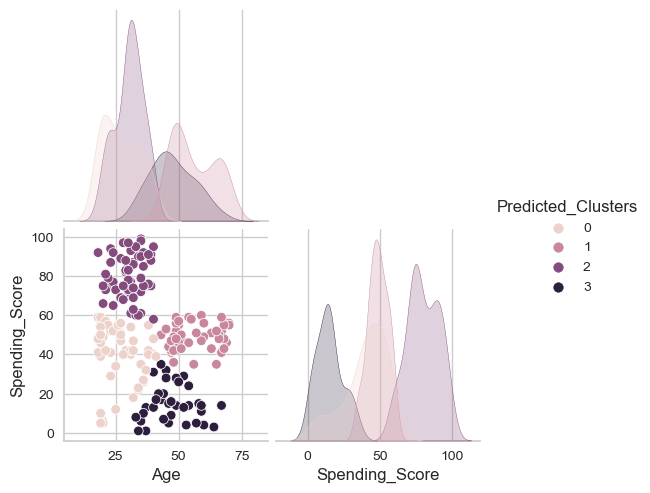

In [144]:
sns.pairplot(data = X_scaled, hue = "Predicted_Clusters", corner = True);

In [145]:
centers = model.cluster_centers_
centers

array([[-0.8346466 , -0.39442706],
       [ 1.22927178, -0.06558366],
       [-0.61415725,  1.14971545],
       [ 0.62833625, -1.36651894]])

In [146]:
centers[:,0]

array([-0.8346466 ,  1.22927178, -0.61415725,  0.62833625])

In [149]:
centers[:,1]

array([-0.39442706, -0.06558366,  1.14971545, -1.36651894])

In [150]:
X_scaled["labels"] = X_scaled.Predicted_Clusters.map({ 0 : "genc_ortaharca", 1: "yaslı_ortaharca", 2: "genc_çokharca", 3: "yaşlı_azharca"})
X_scaled

,Age,Spending_Score,Predicted_Clusters,labels
0,19,39,0,genc_ortaharca
1,21,81,2,genc_çokharca
2,20,6,0,genc_ortaharca
3,23,77,2,genc_çokharca
4,31,40,0,genc_ortaharca
...,...,...,...,...
195,35,79,2,genc_çokharca
196,45,28,3,yaşlı_azharca
197,32,74,2,genc_çokharca
198,32,18,0,genc_ortaharca


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [78]:
X

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


##  dendogram

In [79]:
from scipy.cluster.hierarchy import linkage

In [80]:
hc_ward = linkage(y = X, method = "ward")                        
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

In [81]:
from scipy.cluster.hierarchy import dendrogram

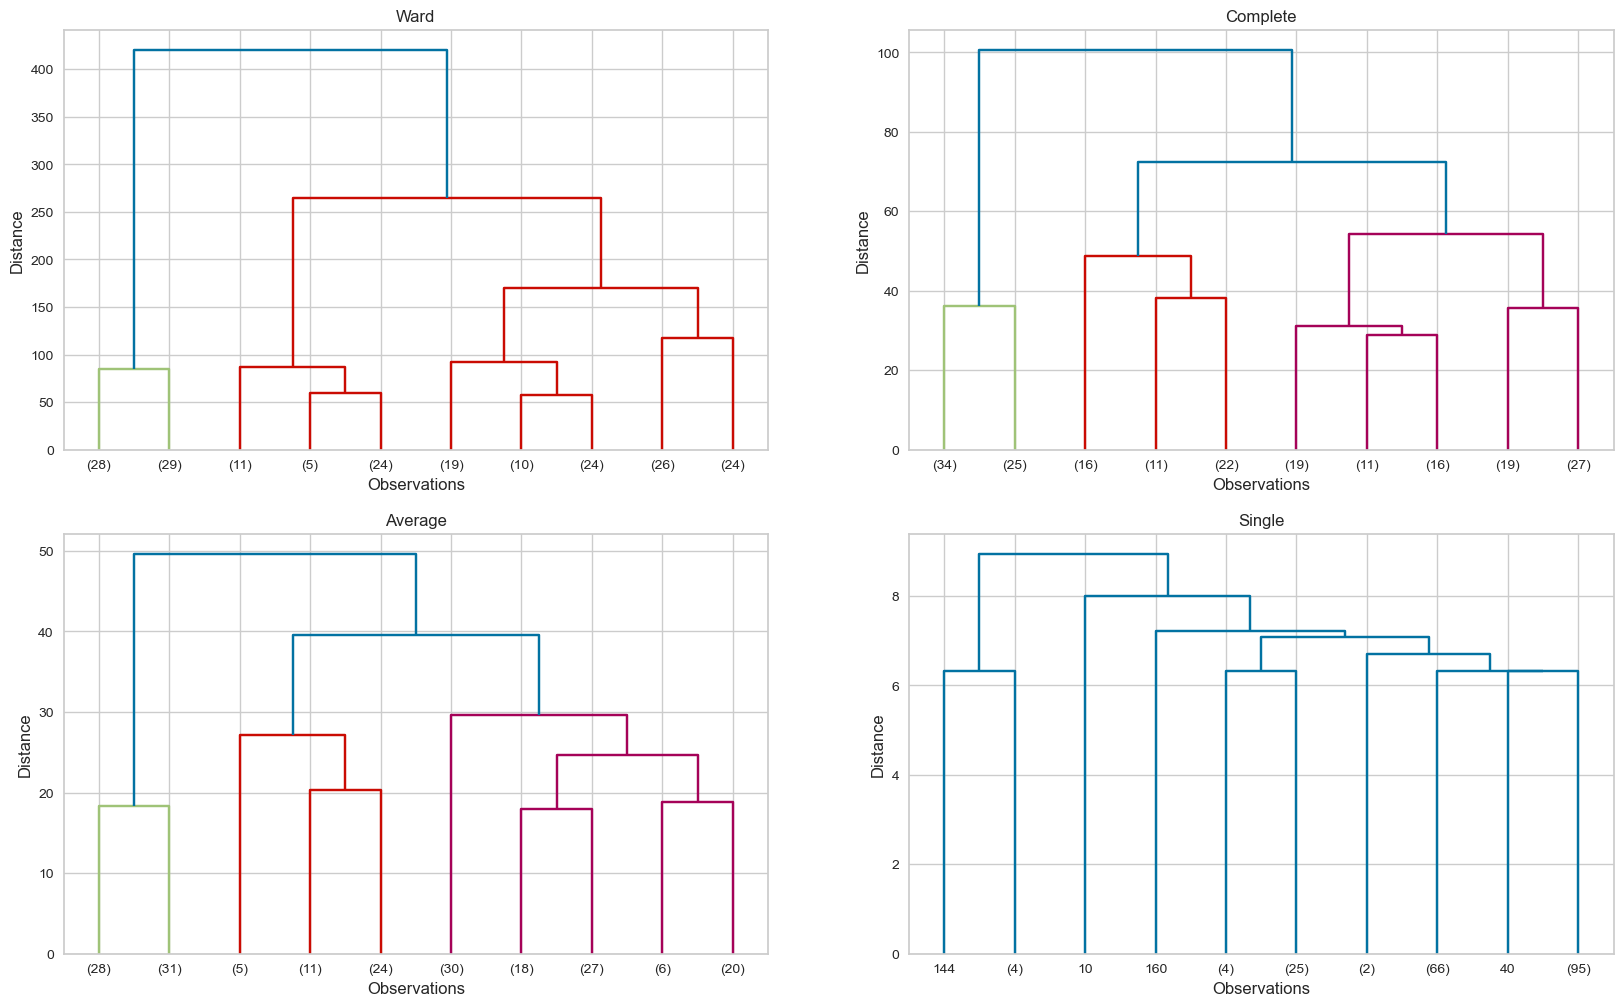

In [82]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_ward, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_complete, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_average, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_single, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10);

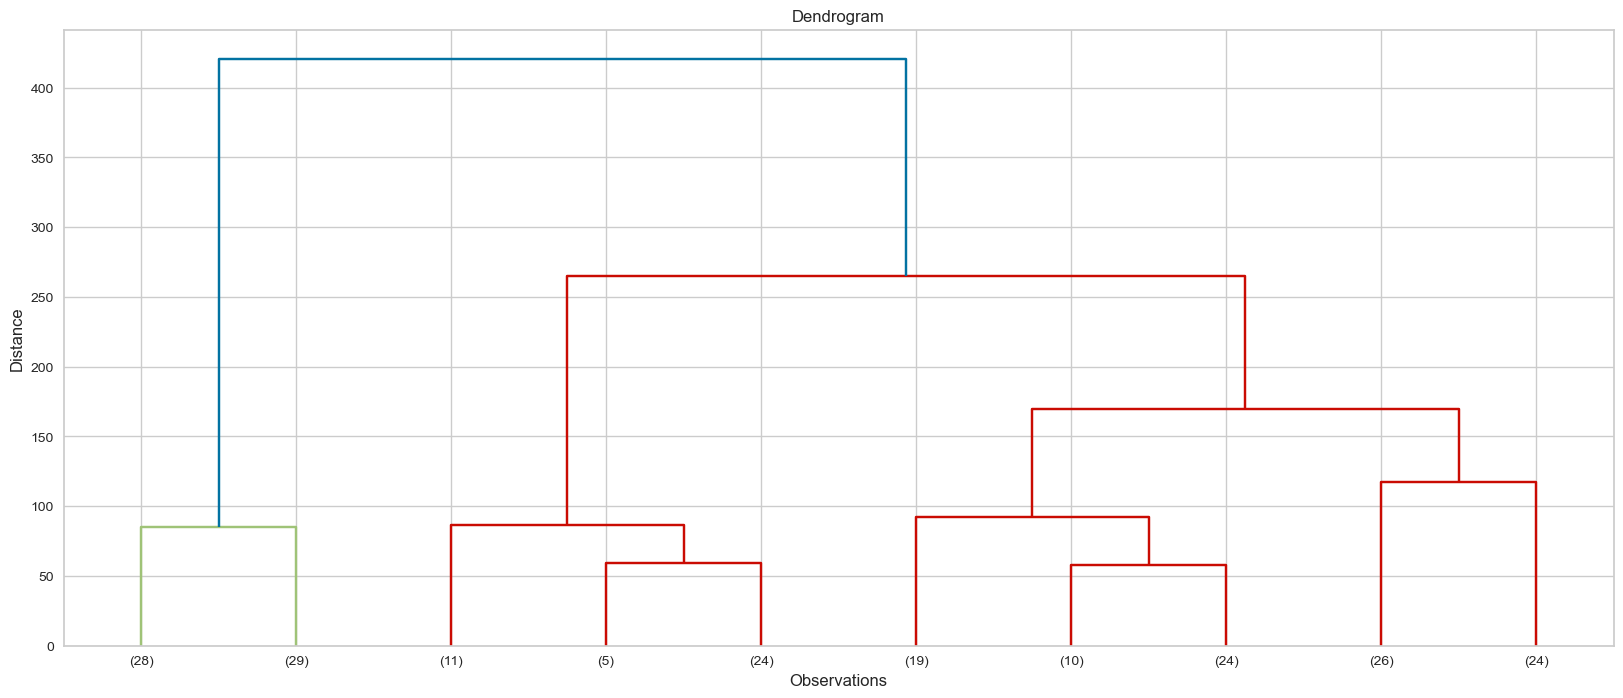

In [83]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_ward, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10);

In [84]:
from sklearn.cluster import AgglomerativeClustering

In [86]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


For n_clusters=4, the silhouette score is 0.4602496389565028

## Clustering based on Annual Income and Spending Score- x2

In [92]:
X1 = df[["Annual_Income","Spending_Score"]]

In [93]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

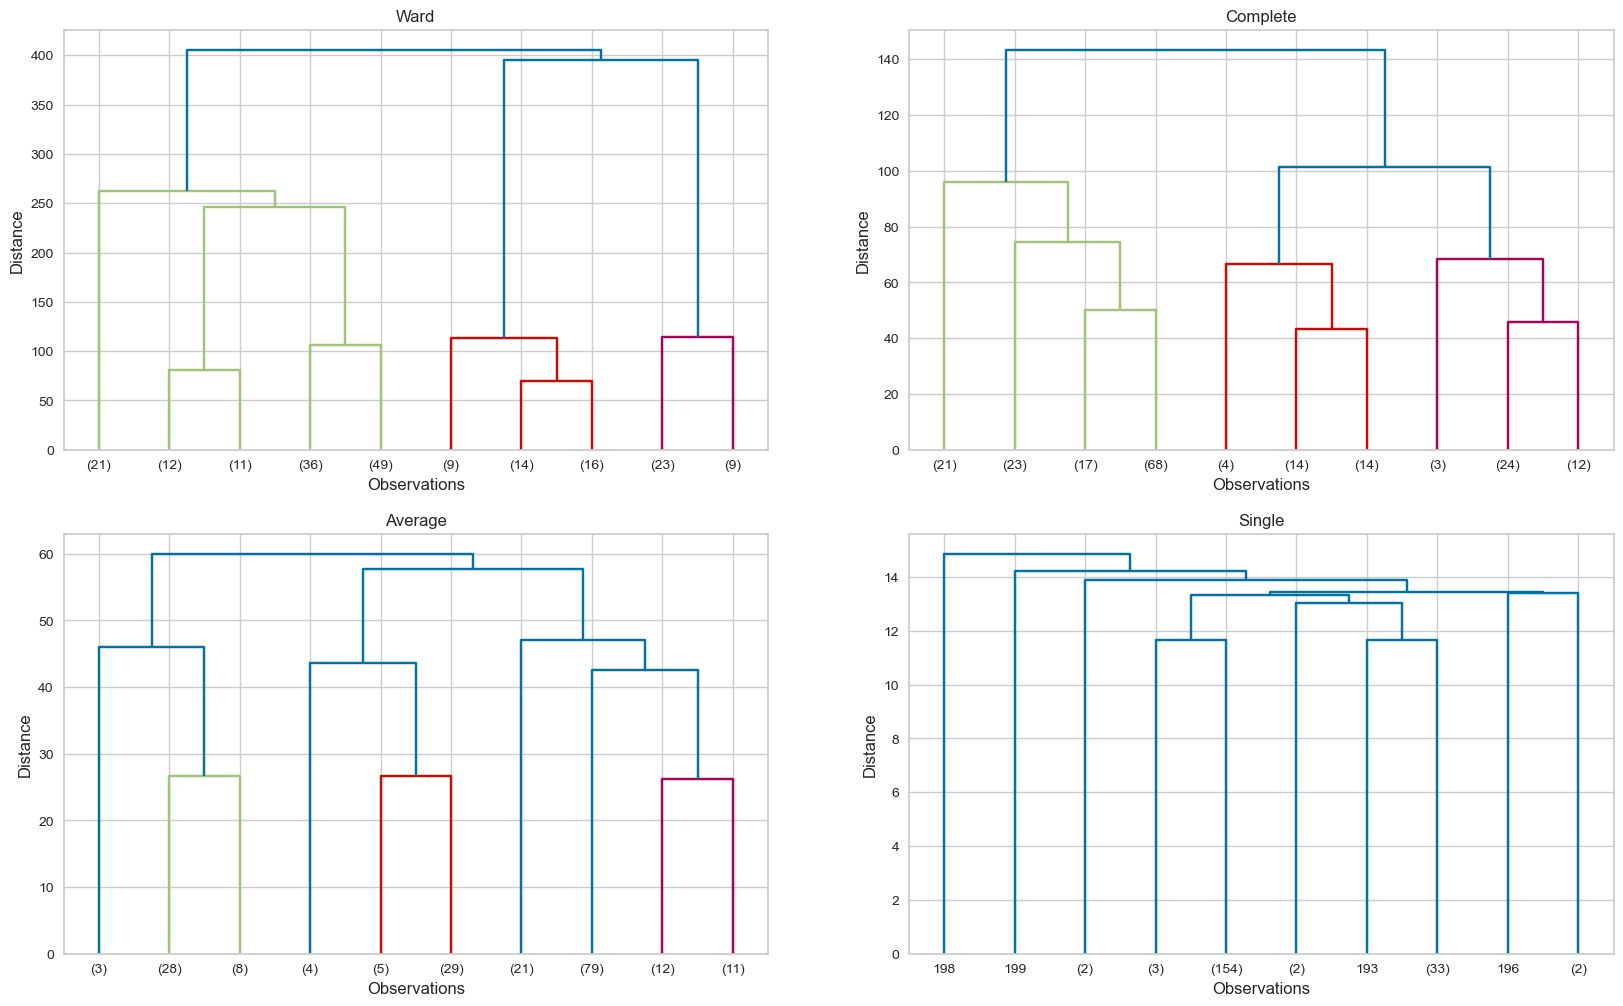

In [94]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_ward, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_complete, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_average, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_single, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10);

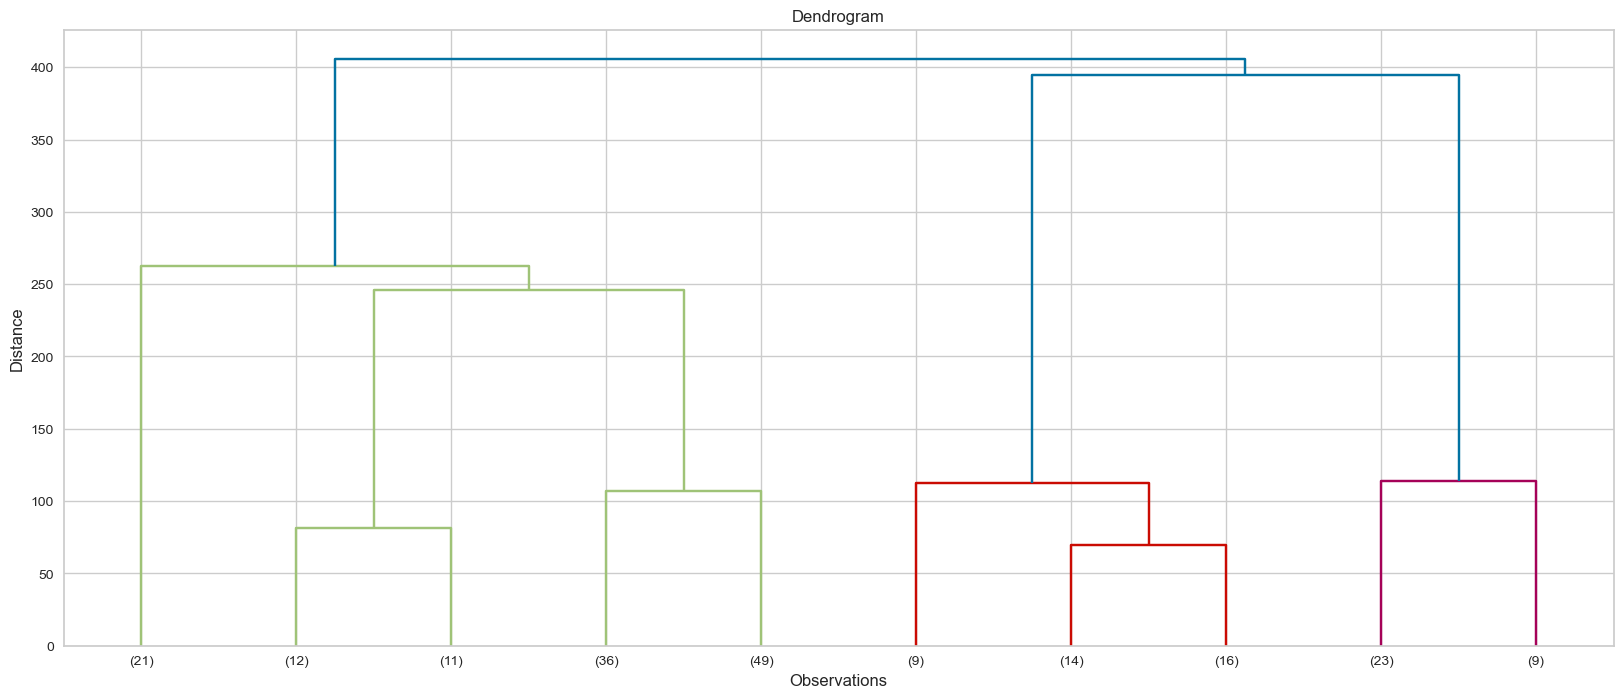

In [95]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(Z=hc_ward, 
           truncate_mode="lastp", 
           p=10, 
           leaf_font_size = 10);

## silhouette_score

In [97]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


For n_clusters=5, the silhouette score is 0.5529945955148897

### ii. *Apply Agglomerative Clustering*

#### Annual Income and Spending Score- x2

In [98]:
X

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [99]:
Agg1 = AgglomerativeClustering(n_clusters=4, 
                               metric='euclidean', 
                               linkage='ward')
y_agg= Agg1.fit_predict(X)   

In [100]:
X_scaled_df

,Annual_Income,Spending_Score,Predicted_Clusters,labels
0,-1.738999,-0.434801,2,fakir
1,-1.738999,1.195704,3,parasız_harcayan
2,-1.700830,-1.715913,2,fakir
3,-1.700830,1.040418,3,parasız_harcayan
4,-1.662660,-0.395980,2,fakir
...,...,...,...,...
195,2.268791,1.118061,4,müsrif
196,2.497807,-0.861839,1,tutumlu
197,2.497807,0.923953,4,müsrif
198,2.917671,-1.250054,1,tutumlu


In [101]:
X_scaled_df['cluster_Agg'] = y_agg
X_scaled_df.head()

,Annual_Income,Spending_Score,Predicted_Clusters,labels,cluster_Agg
0,-1.738999,-0.434801,2,fakir,0
1,-1.738999,1.195704,3,parasız_harcayan,3
2,-1.700830,-1.715913,2,fakir,0
3,-1.700830,1.040418,3,parasız_harcayan,3
4,-1.662660,-0.395980,2,fakir,0


#### Age and Spending Score- x1

In [151]:
X

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [157]:
Agg1 = AgglomerativeClustering(n_clusters=4, 
                               metric='euclidean', 
                               linkage='ward')
y_agg2= Agg1.fit_predict(X)                # linkage = "ward" ise metric='euclidean' zorunludur. affinity, 1.4 sürümünde 
                                      

In [158]:
X_scaled['cluster_Agg'] = y_agg2
X_scaled.head()

,Age,Spending_Score,Predicted_Clusters,labels,cluster_Agg
0,19,39,0,genc_ortaharca,0
1,21,81,2,genc_çokharca,3
2,20,6,0,genc_ortaharca,2
3,23,77,2,genc_çokharca,3
4,31,40,0,genc_ortaharca,0


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [159]:
X_scaled_df

,Annual_Income,Spending_Score,Predicted_Clusters,labels,cluster_Agg
0,-1.738999,-0.434801,2,fakir,0
1,-1.738999,1.195704,3,parasız_harcayan,3
2,-1.700830,-1.715913,2,fakir,0
3,-1.700830,1.040418,3,parasız_harcayan,3
4,-1.662660,-0.395980,2,fakir,0
...,...,...,...,...,...
195,2.268791,1.118061,4,müsrif,2
196,2.497807,-0.861839,1,tutumlu,1
197,2.497807,0.923953,4,müsrif,2
198,2.917671,-1.250054,1,tutumlu,1


<Axes: xlabel='Age', ylabel='Spending_Score'>

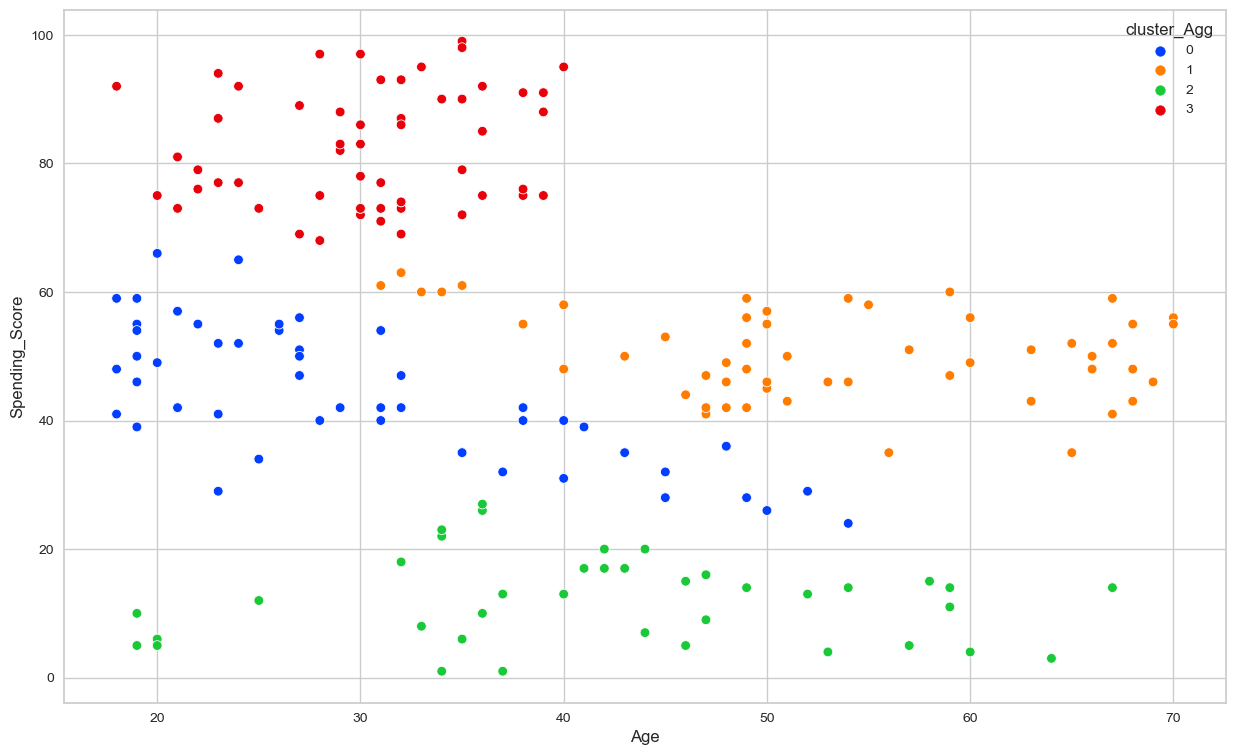

In [163]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', 
                y='Spending_Score', 
                hue='cluster_Agg', 
                data=X_scaled, 
                palette="bright")

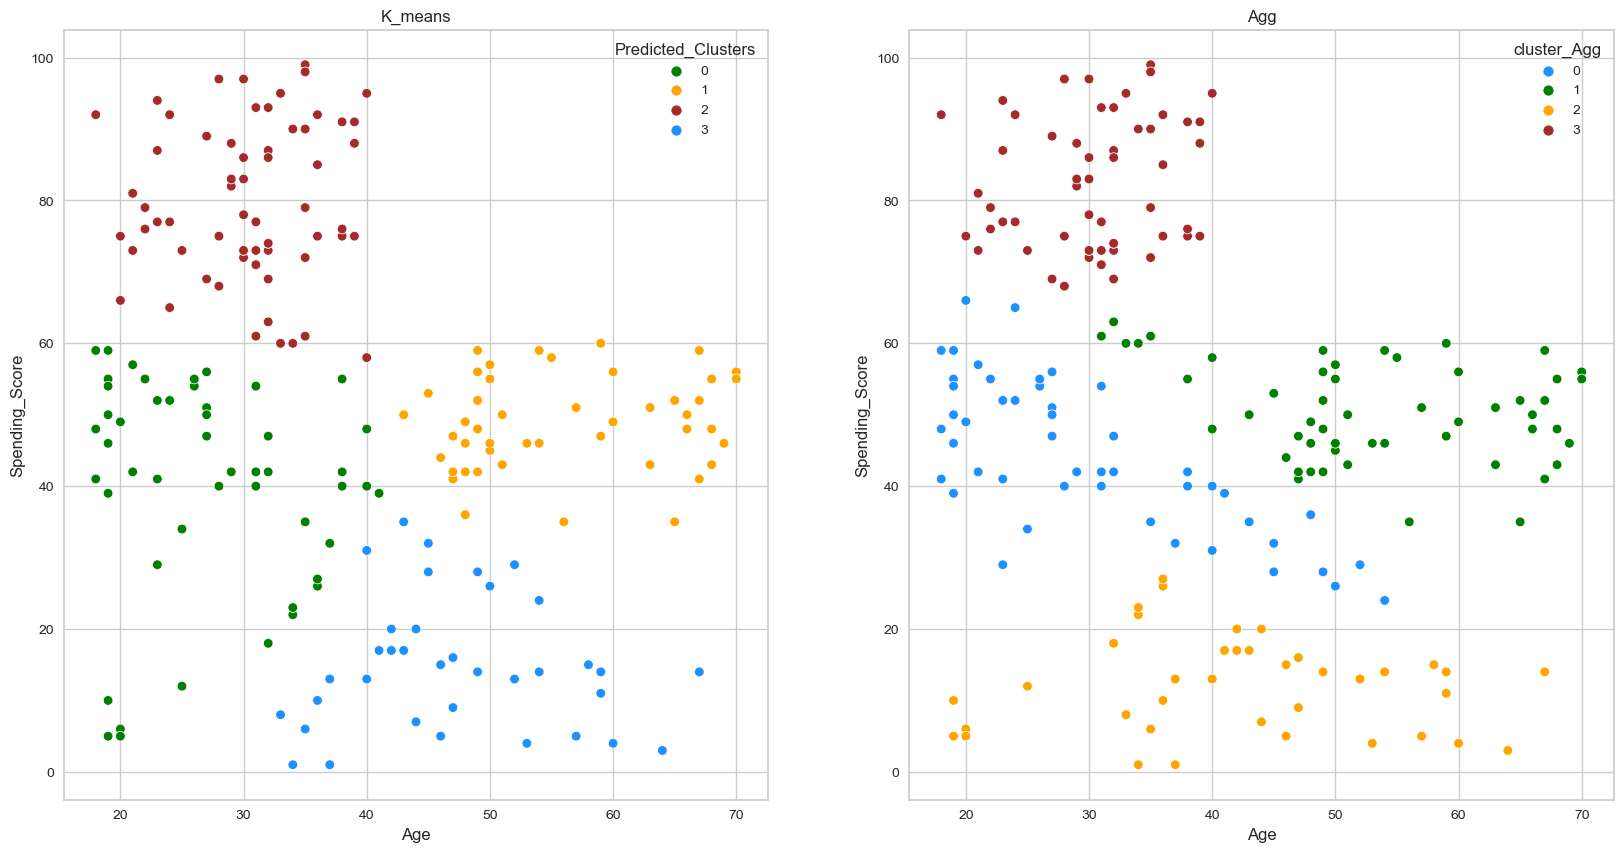

In [171]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', 
                y='Spending_Score', 
                hue='Predicted_Clusters', 
                data=X_scaled, 
                palette=['green','orange','brown','dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', 
                y='Spending_Score', 
                hue='cluster_Agg', 
                data=X_scaled, 
                palette=['dodgerblue','green', 'orange','brown'])
plt.title("Agg");

#### Annual Income and Spending Score- x2

In [165]:
X_scaled_df

,Annual_Income,Spending_Score,Predicted_Clusters,labels,cluster_Agg
0,-1.738999,-0.434801,2,fakir,0
1,-1.738999,1.195704,3,parasız_harcayan,3
2,-1.700830,-1.715913,2,fakir,0
3,-1.700830,1.040418,3,parasız_harcayan,3
4,-1.662660,-0.395980,2,fakir,0
...,...,...,...,...,...
195,2.268791,1.118061,4,müsrif,2
196,2.497807,-0.861839,1,tutumlu,1
197,2.497807,0.923953,4,müsrif,2
198,2.917671,-1.250054,1,tutumlu,1


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

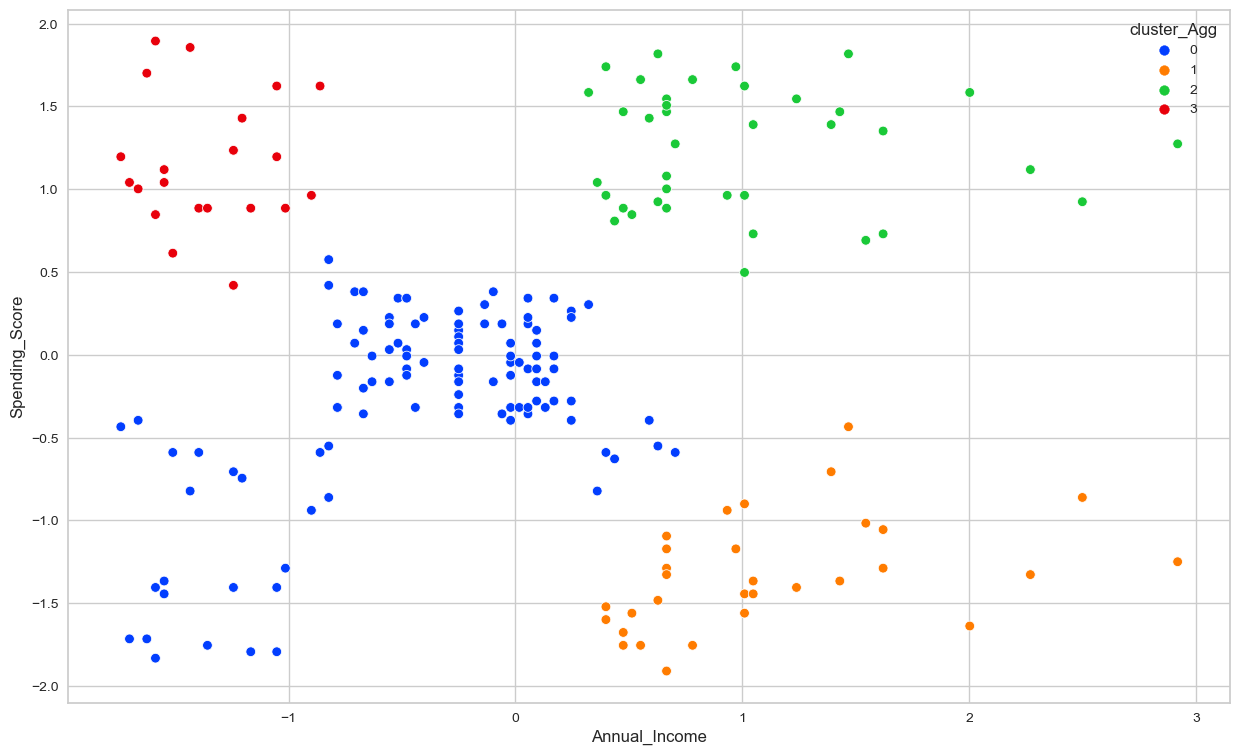

In [166]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', 
                y='Spending_Score', 
                hue='cluster_Agg', 
                data=X_scaled_df, 
                palette="bright")

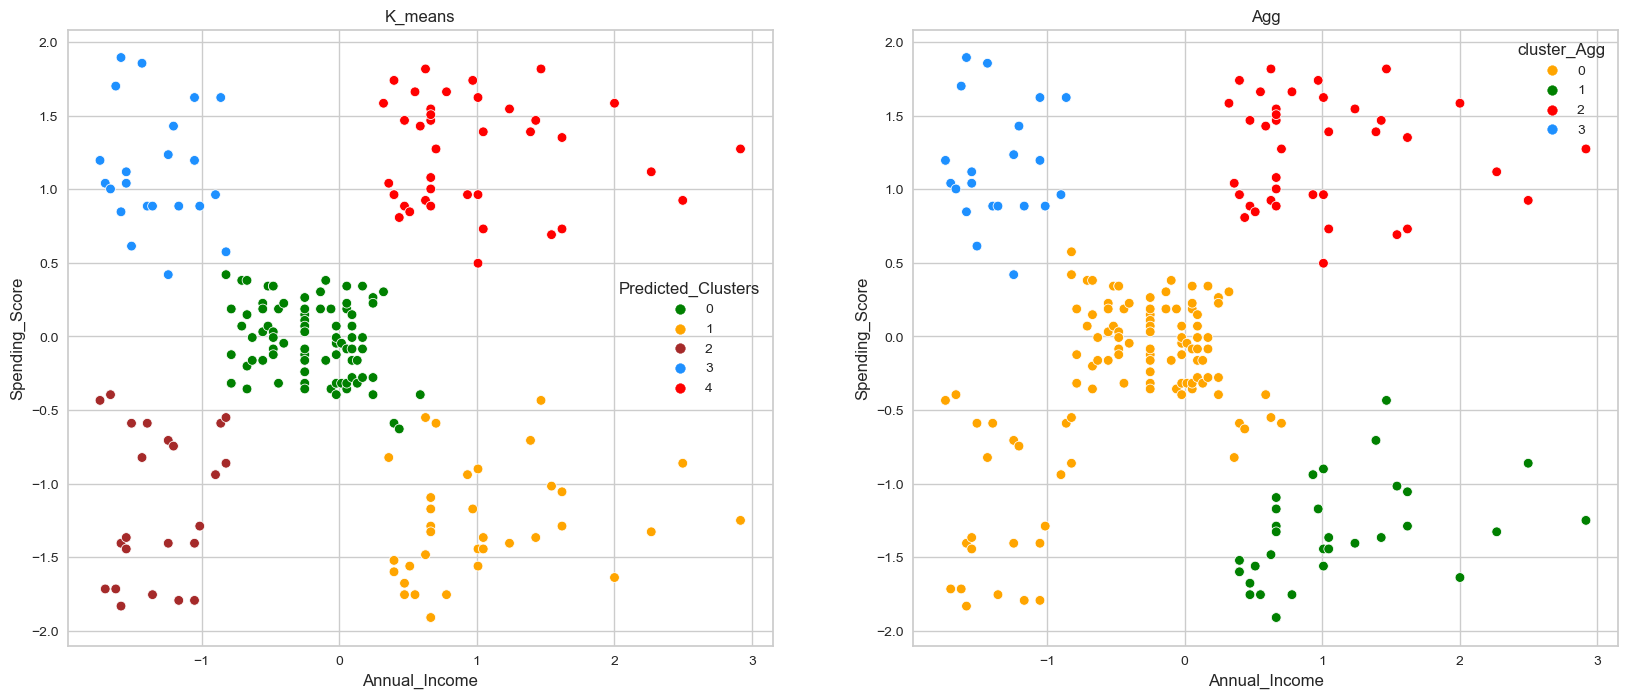

In [169]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', 
                y='Spending_Score', 
                hue='Predicted_Clusters', 
                data=X_scaled_df, 
                palette=['green', 'orange', 'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', 
                y='Spending_Score', 
                hue='cluster_Agg', 
                data=X_scaled_df, 
                palette=['orange', 'green','red', 'dodgerblue', 'brown'])
plt.title("Agg");

#### Interpretation based on Age and Spending Score- x1

In [170]:
X_scaled

,Age,Spending_Score,Predicted_Clusters,labels,cluster_Agg
0,19,39,0,genc_ortaharca,0
1,21,81,2,genc_çokharca,3
2,20,6,0,genc_ortaharca,2
3,23,77,2,genc_çokharca,3
4,31,40,0,genc_ortaharca,0
...,...,...,...,...,...
195,35,79,2,genc_çokharca,3
196,45,28,3,yaşlı_azharca,0
197,32,74,2,genc_çokharca,3
198,32,18,0,genc_ortaharca,2


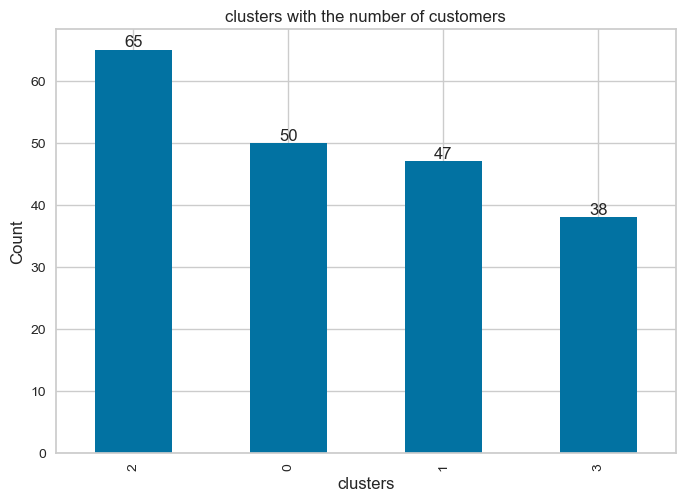

In [172]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X_scaled.Predicted_Clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [175]:
df

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [176]:
df["cluster_Age_Spending_Score"] = X_scaled.Predicted_Clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


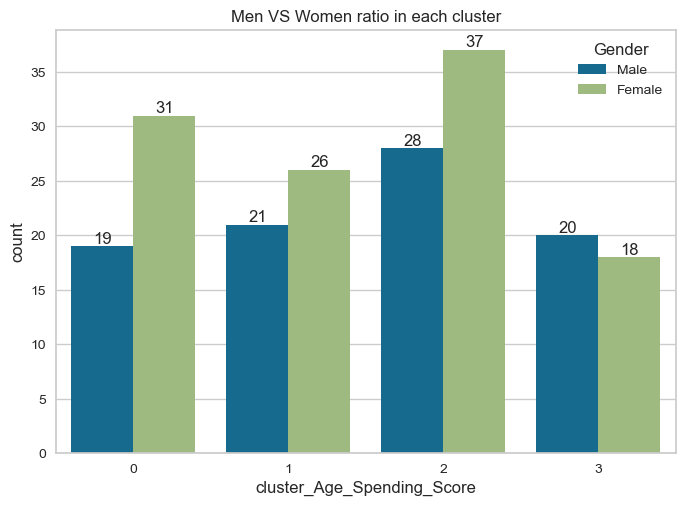

In [177]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, 
                  hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [178]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,27.220000,59.620000,40.040000
1,55.978723,54.425532,48.510638
2,30.292308,63.830769,79.815385
3,47.605263,63.789474,15.000000


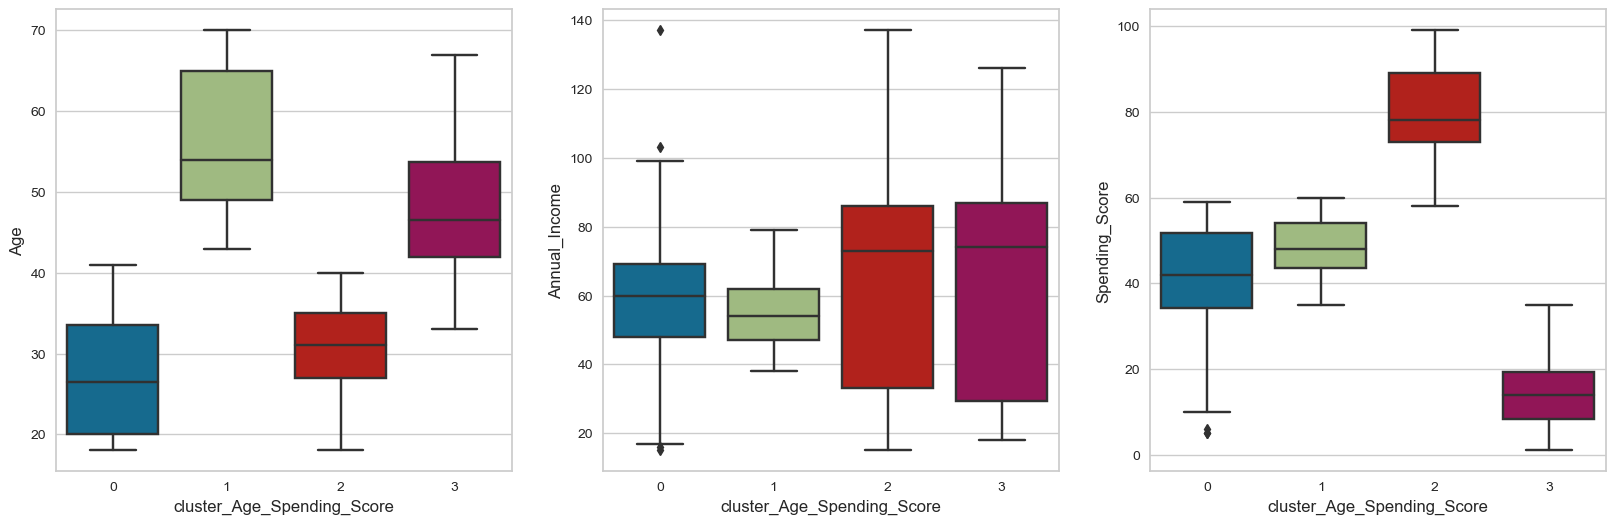

In [179]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", 
            x = "cluster_Age_Spending_Score", 
            data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", 
            x = "cluster_Age_Spending_Score",  
            data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", 
            x = "cluster_Age_Spending_Score", 
            data = df);

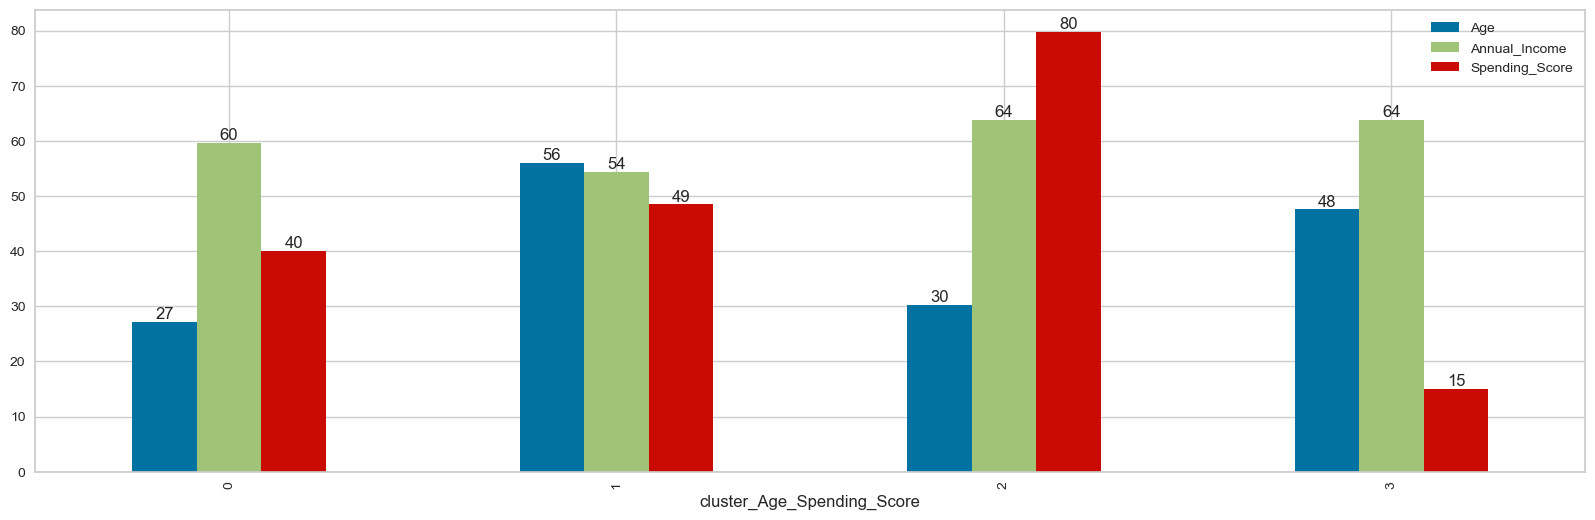

In [180]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [167]:
X_scaled_df

,Annual_Income,Spending_Score,Predicted_Clusters,labels,cluster_Agg
0,-1.738999,-0.434801,2,fakir,0
1,-1.738999,1.195704,3,parasız_harcayan,3
2,-1.700830,-1.715913,2,fakir,0
3,-1.700830,1.040418,3,parasız_harcayan,3
4,-1.662660,-0.395980,2,fakir,0
...,...,...,...,...,...
195,2.268791,1.118061,4,müsrif,2
196,2.497807,-0.861839,1,tutumlu,1
197,2.497807,0.923953,4,müsrif,2
198,2.917671,-1.250054,1,tutumlu,1


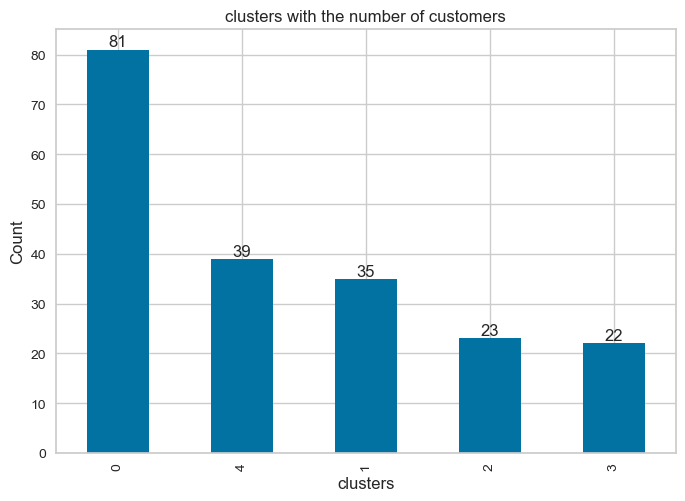

In [173]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X_scaled_df.Predicted_Clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [181]:
X_scaled_df.Predicted_Clusters.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Predicted_Clusters, dtype: int64

In [182]:
df["cluster_Annual_Income_Spending_Score"] = X_scaled_df.Predicted_Clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,0,2
1,Male,21,15,81,2,3
2,Female,20,16,6,0,2
3,Female,23,16,77,2,3
4,Female,31,17,40,0,2


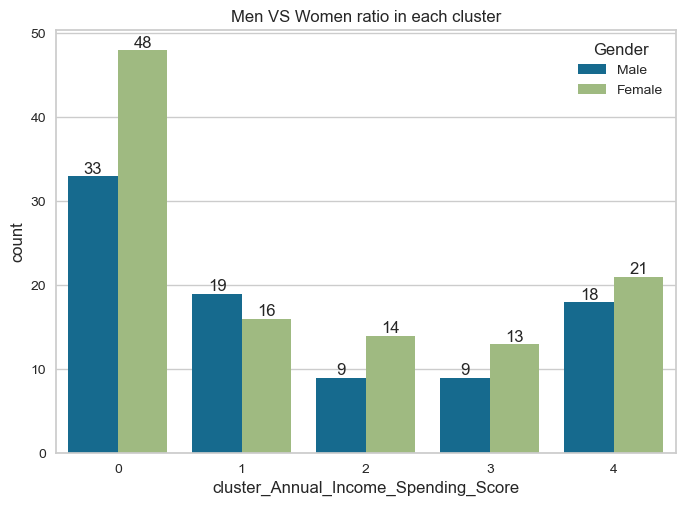

In [183]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [184]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()


Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             Spending_Score  \
Gender cluster_Annual_Income_Spending_Score                   
Female 0                                          49.000000   
       1                                          22.062500   
       2                                          21.714286   
       3                                          80.538462   
       4                                          81.666667   
Male   0                                          50.272727   
       1                                          12.947368   
       2                                          19.666667   
       3                                          77.666667   
       4                                          82.666667   

                                             cluster_Age_Spending_Score  
Gender cluster_Annual_Income_Spending_Score                              
Female 0                                                       0.625000  
       1                                                       1.750000  
       2                                                       2.000000  
       3                                                       2.000000  
       4                                                       2.000000  
Male   0                                                       0.727273  
       1                                                       2.105263  
       2                                                       2.111111  
       3                                                       2.000000  
       4                                                       2.000000

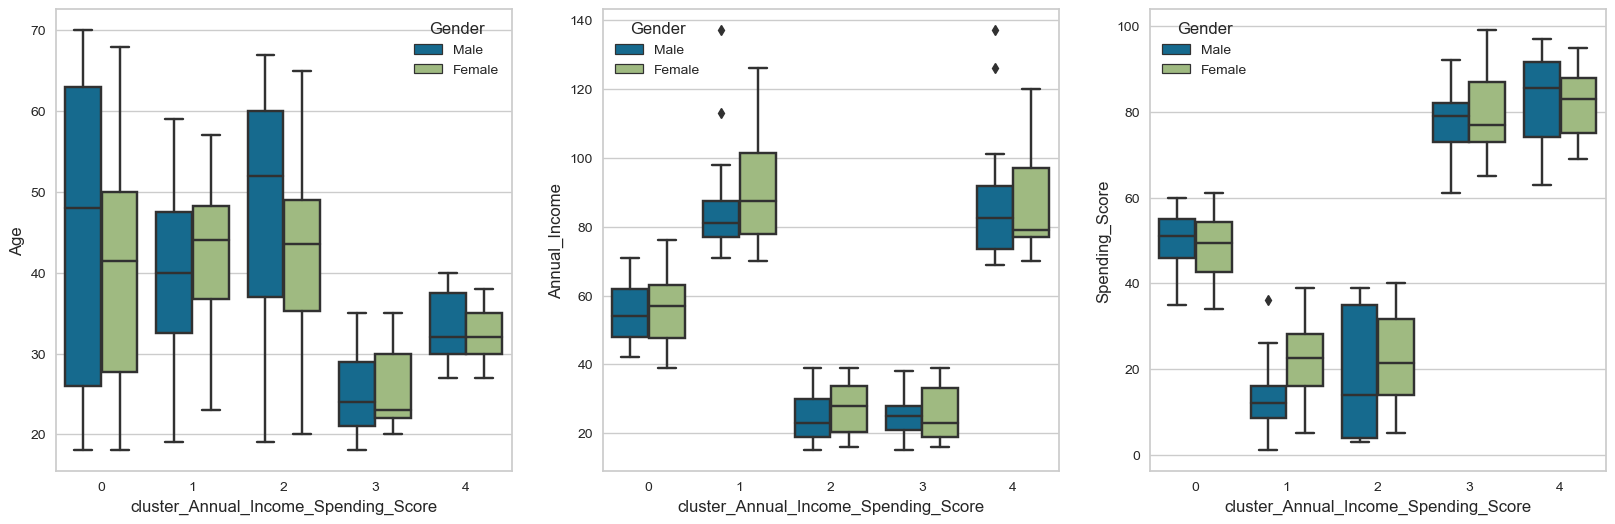

In [185]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", 
            x = "cluster_Annual_Income_Spending_Score", 
            hue= "Gender", 
            data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", 
            x = "cluster_Annual_Income_Spending_Score", 
            hue= "Gender", 
            data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", 
            x = "cluster_Annual_Income_Spending_Score", 
            hue= "Gender", 
            data = df);

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___